# EDA 사용 설명서 3탄 - Seaborn

## 1. Seaborn이란?
- Seaborn: Matplotlib을 기반으로 하는 python 데이터 시각화 라이브러리

#### [ parameters ]
- x, y: x, y축의 위치를 지정하는 변수


- hue: 다른 색상의 선을 생성하는 그룹화 변수


- size: 너비가 다른 선을 생성하는 그룹화 변수


- style: 다른 스타일의 마커 또는 선을 생성하는 그룹화 변수


- data: 데이터 구조 입력


- palette: hue 체계를 매핑할 때 사용할 색상 선택

## 2. 사전 준비

### 1) seaborn 설치하기

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### 2) seaborn import 하기
- seaborn은 'sns'라는 별칭으로 import 


- matplotlib 패키지를 기반으로 하고 있기 때문에 matplotlib도 import

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3) 데이터 불러오기
- seaborn의 샘플 데이터셋 사용

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 3. Relational plots
- x값과 y값의 관계를 그려주는 관계형 그래프

### 1) lineplot()
- 선 그래프를 그리는 함수

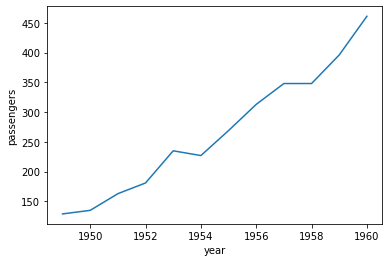

In [6]:
april_flights = flights.query("month == 'Apr'")
sns.lineplot(data=april_flights, x='year', y='passengers')
plt.show()

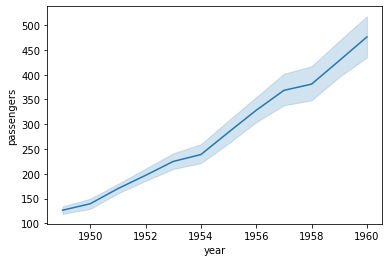

In [9]:
# 전체 데이터셋 할당하면 평균과 신뢰구간 표시
sns.lineplot(data=flights, x='year', y='passengers')  
plt.show()

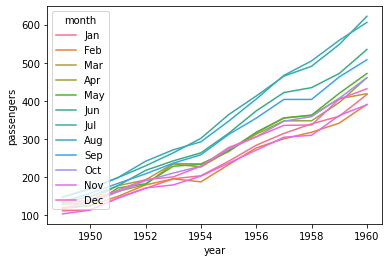

In [12]:
# 월별로 다른 선 색상
sns.lineplot(data=flights, x='year', y='passengers', hue='month')
plt.show()

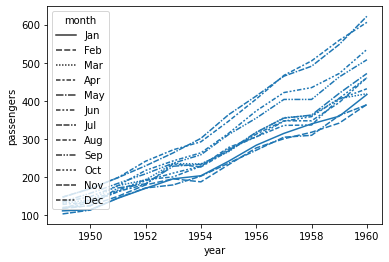

In [13]:
# 월별로 다른 선 스타일
sns.lineplot(data=flights, x='year', y='passengers', style='month')
plt.show()

### 2) scatterplot()
- 산점도를 그리는 함수, 두 개의 실수 데이터 집합의 상관관계 파악 가능

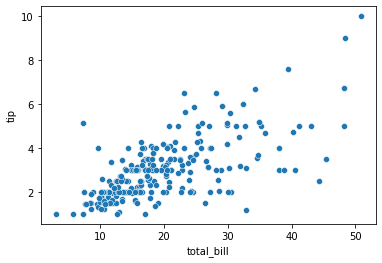

In [14]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

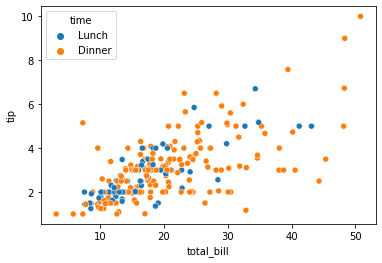

In [15]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.show()

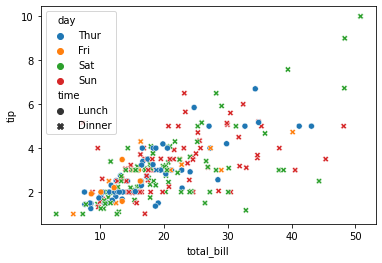

In [16]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time')
plt.show()

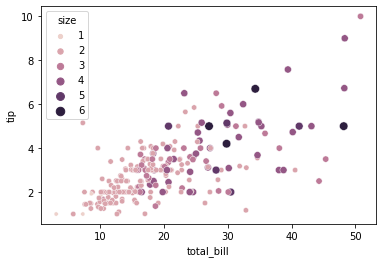

In [17]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', size='size')
plt.show()

## 4. Distribution plots
- 변수 값의 분포를 나타내기 위한 그래프

### 1) displot()
- 히스토그램을 그리는 함수

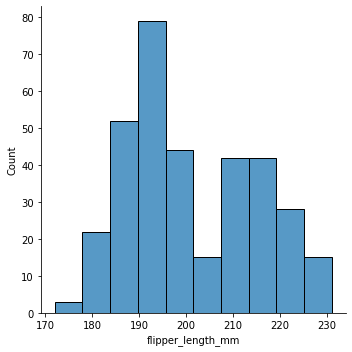

In [18]:
sns.displot(data=penguins, x='flipper_length_mm')
plt.show()

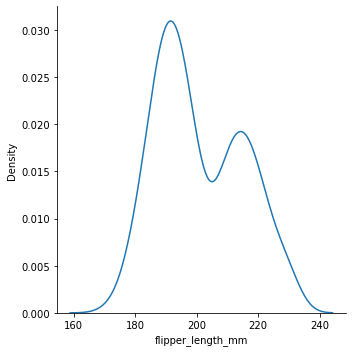

In [21]:
# kind='kde': 일변량 또는 이변량 분포
sns.displot(data=penguins, x='flipper_length_mm', kind='kde')
plt.show()

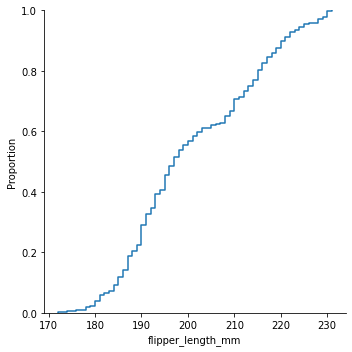

In [23]:
# kind='ecdf': 경험적 누적 분포 함수(각 고유값에 대한 관찰의 비율 또는 개수)
sns.displot(data=penguins, x='flipper_length_mm', kind='ecdf')
plt.show()

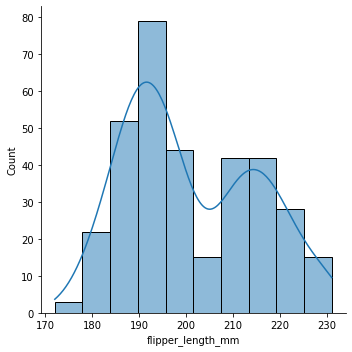

In [24]:
# kde=True: kde 곡선이 추가된 히스토그램
sns.displot(data=penguins, x='flipper_length_mm', kde=True)
plt.show()

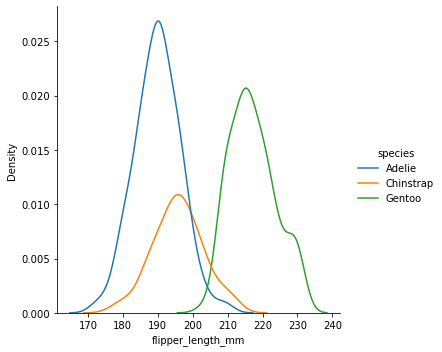

In [25]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde')
plt.show()

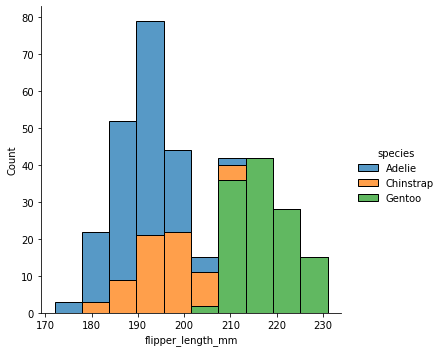

In [36]:
# 여러 개의 막대를 쌓는 형식
sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')
plt.show()

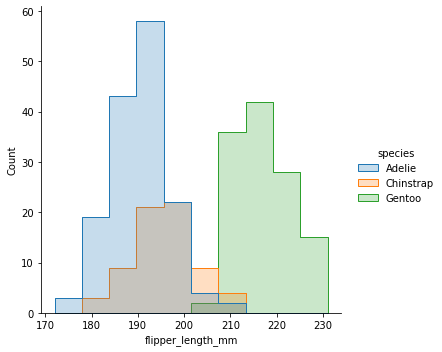

In [37]:
# element='step': 겹치는 막대의 시각적 어려움 해결
sns.displot(data=penguins, x='flipper_length_mm', hue='species', element='step')
plt.show()

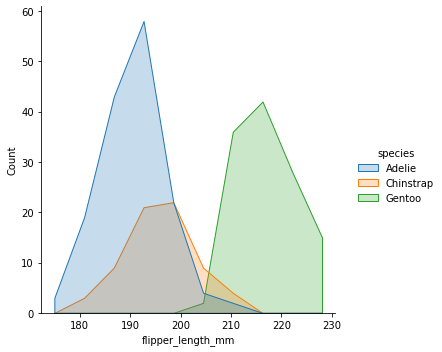

In [39]:
# element='poly': 다각형의 형태인 히스토그램
sns.displot(data=penguins, x='flipper_length_mm', hue='species', element='poly')
plt.show()

### 2) histplot()
- 히스토그램을 그리는 함수

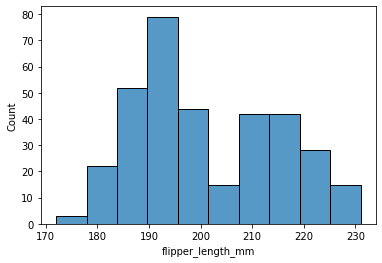

In [27]:
sns.histplot(data=penguins, x='flipper_length_mm')
plt.show()

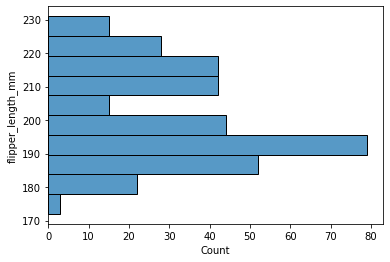

In [28]:
sns.histplot(data=penguins, y='flipper_length_mm')
plt.show()

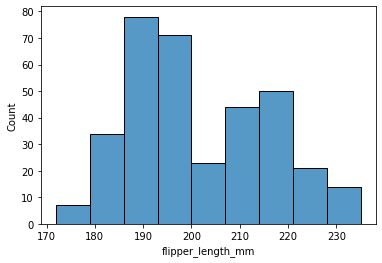

In [31]:
sns.histplot(data=penguins, x='flipper_length_mm', binwidth=7)
plt.show()

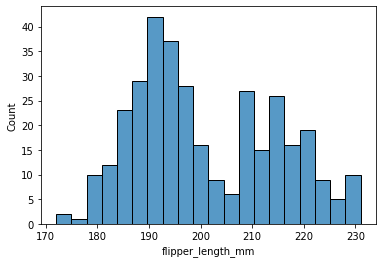

In [32]:
sns.histplot(data=penguins, x='flipper_length_mm', bins=20)
plt.show()

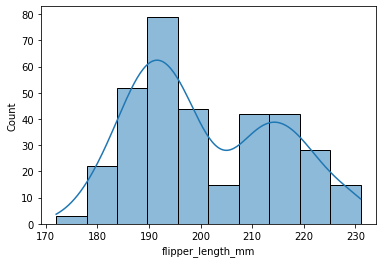

In [33]:
sns.histplot(data=penguins, x='flipper_length_mm', kde=True)
plt.show()

## 5. Categorical plots
- 범주형 변수와 연속형 변수 간의 관계를 나타내기 위한 그래프

#### [ 스타일 지정 ]
- set_theme(): plot에 대한 시각적 테마를 설정하는 함수 (스타일, 팔레트, 글꼴, 글꼴 크기 등)

### 1) barplot()
- 막대 그래프를 그리는 함수


- 직사각형 막대로 범주형 데이터 요약

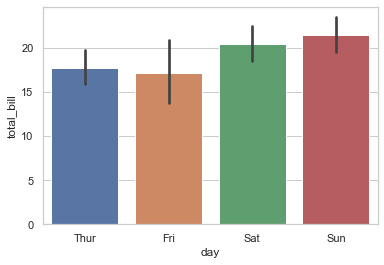

In [40]:
sns.set_theme(style='whitegrid')   # 스타일 지정
sns.barplot(data=tips, x='day', y='total_bill')
plt.show()

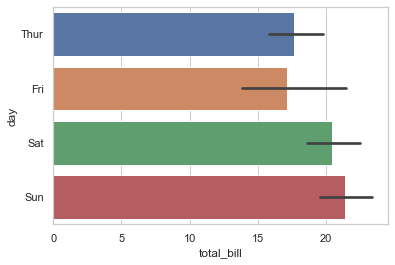

In [41]:
sns.barplot(data=tips, x='total_bill', y='day')
plt.show()

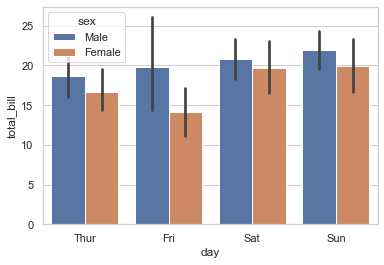

In [42]:
sns.barplot(data=tips, x='day', y='total_bill', hue='sex')
plt.show()

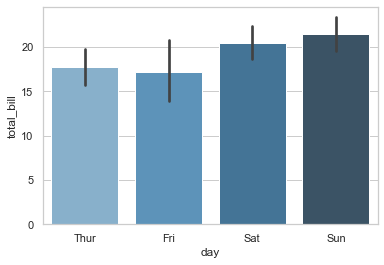

In [43]:
sns.barplot(data=tips, x='day', y='total_bill', palette='Blues_d')
plt.show()

### 2) boxplot()
- 범주에 대한 분포를 표시하는 상자 그림을 그릴 수 있는 함수

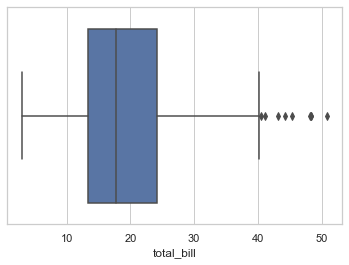

In [44]:
sns.boxplot(x=tips['total_bill'])
plt.show()

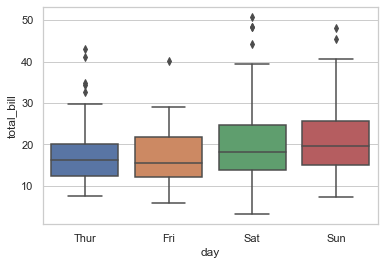

In [45]:
sns.boxplot(data=tips, x='day', y='total_bill')
plt.show()

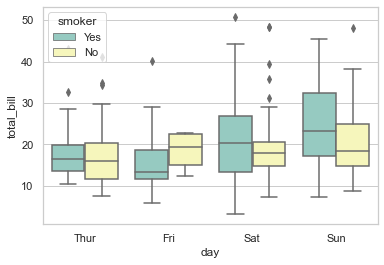

In [46]:
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker', palette='Set3')
plt.show()

### 3) countplot()
- 막대를 사용하여 범주형 변수의 관측값 개수를 표시하는 함수

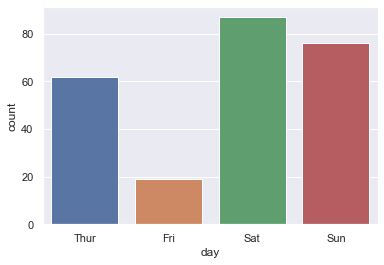

In [47]:
sns.set_theme(style='darkgrid')
sns.countplot(data=tips, x='day')
plt.show()

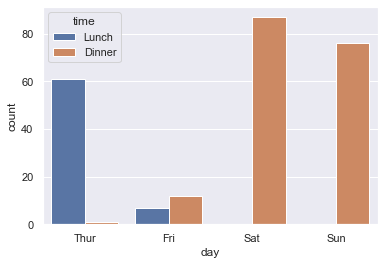

In [48]:
sns.countplot(data=tips, x='day', hue='time')
plt.show()

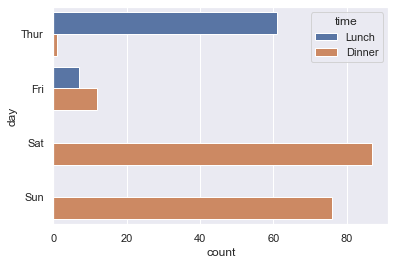

In [49]:
sns.countplot(data=tips, y='day', hue='time')
plt.show()

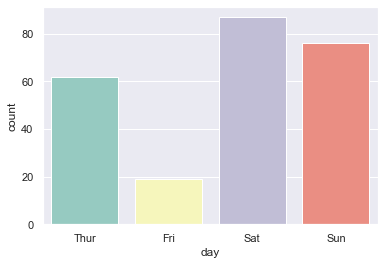

In [50]:
sns.countplot(data=tips, x='day', palette='Set3')
plt.show()

### 4) stripplot()
- 하나의 변수가 범주형인 산점도를 그리는 함수

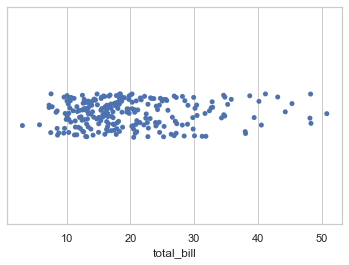

In [51]:
sns.set_theme(style='whitegrid')
sns.stripplot(x=tips['total_bill'])
plt.show()

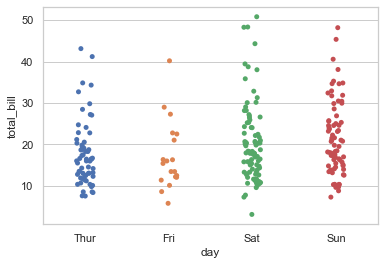

In [52]:
sns.stripplot(data=tips, x='day', y='total_bill')
plt.show()

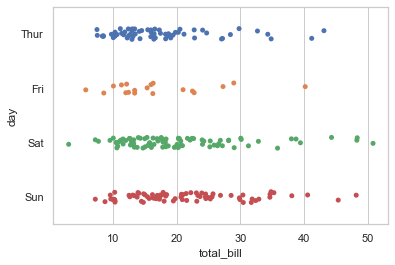

In [53]:
sns.stripplot(data=tips, x='total_bill', y='day')
plt.show()

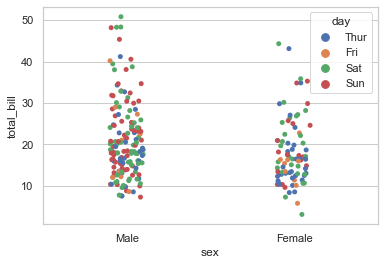

In [54]:
sns.stripplot(data=tips, x='sex', y='total_bill', hue='day')
plt.show()

### 5) swarmplot()
- 점이 겹치지 않는 범주형 산점도를 그리는 함수

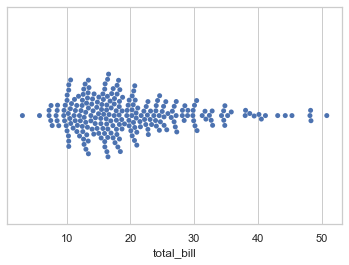

In [55]:
sns.swarmplot(x=tips['total_bill'])
plt.show()

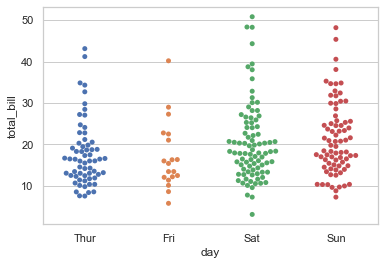

In [56]:
sns.swarmplot(data=tips, x='day', y='total_bill')
plt.show()

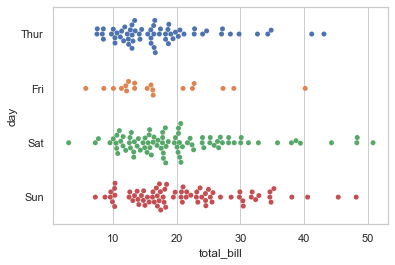

In [57]:
sns.swarmplot(data=tips, x='total_bill', y='day')
plt.show()

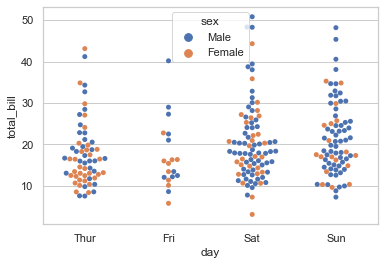

In [58]:
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex')
plt.show()